<a href="https://colab.research.google.com/github/Ramya1410/Decision-Tree-Classifier/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('car_evaluation.csv')

In [27]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [28]:
df.shape

(1727, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [30]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [31]:
col_names = ['buying','maint','doors','person','lug_boot','safety','class']
df.columns = col_names
df.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [32]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

checking for null values

In [33]:
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [34]:
x = df.drop(['class'],axis=1)
y=df['class']

Split data into separate training and test set 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [37]:
x_train.shape

(1208, 6)

In [38]:
x_test.shape

(519, 6)

Encode categorical variables

In [39]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import category_encoders as ce

In [41]:
x_train.head()

,buying,maint,doors,person,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [42]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','person','lug_boot','safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [43]:
x_train.head()

,buying,maint,doors,person,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [44]:
x_test.head()

,buying,maint,doors,person,lug_boot,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
gini_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
gini_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the Test set results with criterion gini index


In [47]:
y_pred_gini = gini_clf.predict(x_test)

Check accuracy score with criterion gini index

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print('model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with criterion gini index: 0.8150


Comparing the train-set and test-set accuracy

In [50]:
y_pred_train_gini = gini_clf.predict(x_train)

In [52]:
print('model training-set accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

model training-set accuracy score with criterion gini index: 0.8013


Check for overfitting and underfitting

In [53]:
print('Training set score: {:.4f}'.format(gini_clf.score(x_train,y_train)))
print('Testing score: {:.4f}'.format(gini_clf.score(x_test,y_test)))

Training set score: 0.8013
Testing score: 0.8150


Visualizing decision-trees


[Text(0.6666666666666666, 0.875, 'X[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'X[3] <= 2.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.634\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.5, 0.125, 'gini = 0.458\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

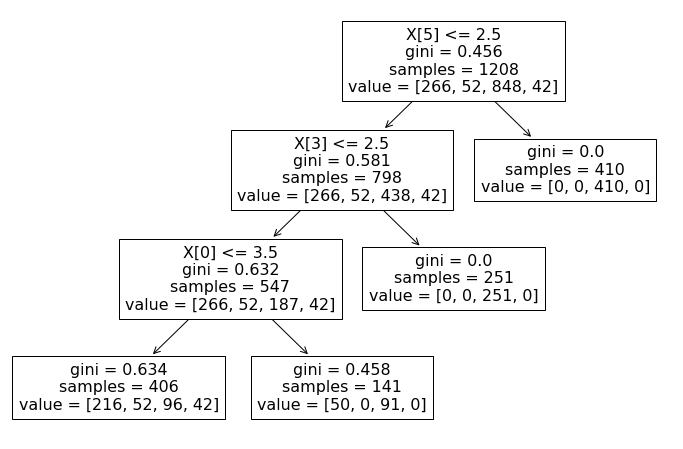

In [54]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(gini_clf.fit(x_train,y_train))

Visualizing decision-trees with graphviz


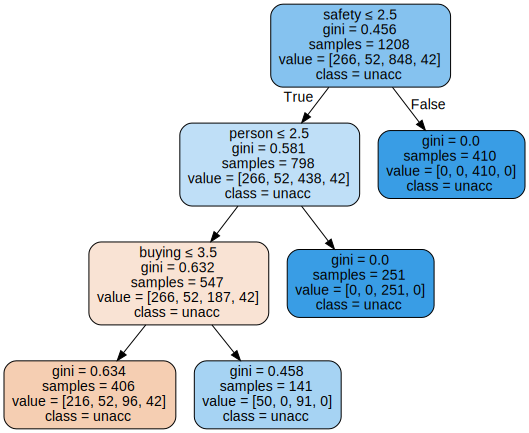

In [55]:
import graphviz
dot_data = tree.export_graphviz(gini_clf, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph

Decision Tree Classifier with criterion entropy

In [56]:
en_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
en_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entropy


In [57]:
y_pred_en = en_clf.predict(x_test)

Check accuracy score with criterion entropy

In [58]:
print('model accuracy score with criterion entropy index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

model accuracy score with criterion entropy index: 0.8150


Compare the train-set and test-set accuracy

In [60]:
y_pred_train_en = en_clf.predict(x_train)

In [61]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8013


Check for overfitting and underfitting

In [62]:
print('Training set score: {:.4f}'.format(en_clf.score(x_train,y_train)))
print('Testing score: {:.4f}'.format(en_clf.score(x_test,y_test)))

Training set score: 0.8013
Testing score: 0.8150


Visualize decision-trees

[Text(0.6666666666666666, 0.875, 'X[5] <= 2.5\nentropy = 1.203\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'X[3] <= 2.5\nentropy = 1.484\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 3.5\nentropy = 1.642\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.695\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.5, 0.125, 'entropy = 0.938\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

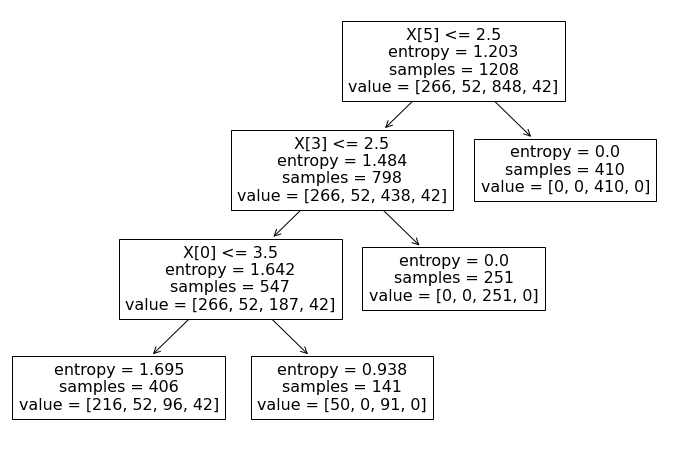

In [63]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(en_clf.fit(x_train,y_train))

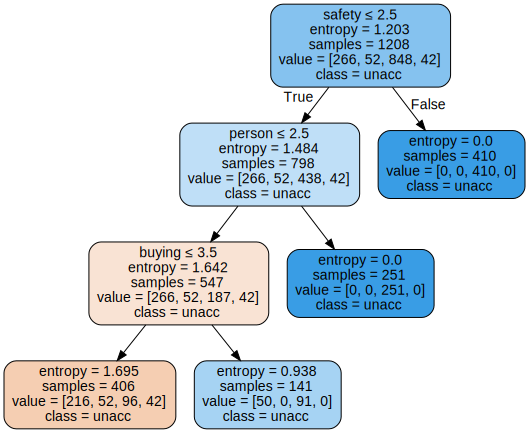

In [64]:
dot_data_en = tree.export_graphviz(en_clf, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data_en) 
graph

confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_en)
print('confusion matrix:\n\n',cm)

confusion matrix:

 [[ 96   0  22   0]
 [ 17   0   0   0]
 [ 34   0 327   0]
 [ 23   0   0   0]]


Classification Report

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.81      0.67       118
        good       0.00      0.00      0.00        17
       unacc       0.94      0.91      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.82       519
   macro avg       0.38      0.43      0.40       519
weighted avg       0.78      0.82      0.79       519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
